## Set Up Code

This code section should be used to load dataset and save datasets so they do not have to be downloaded everytime.

In [48]:
# import tensorflow as tf
from tensorflow.keras import models, datasets, layers, losses

import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex

import joblib
import os

## Cifar10 Dataset

This dataset has 10 classes. It is easy to download and use. The following code blocks will allow for the downloading and model training using this image set.

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [49]:
# file name aliases to save and load model data

# cifar10
cifar10_train_images_file = 'data/cifar10_train_images.jb'
cifar10_test_images_file = 'data/cifar10_test_images.jb'
cifar10_train_labels_file = 'data/cifar10_train_labels.jb'
cifar10_test_labels_file = 'data/cifar10_test_labels.jb'

In [50]:
# Saves cifar10 data using joblib

with open(cifar10_train_images_file, 'wb+') as f:
    joblib.dump(train_images, f)
    
with open(cifar10_test_images_file, 'wb+') as f:
    joblib.dump(test_images, f)
    
with open(cifar10_train_labels_file, 'wb+') as f:
    joblib.dump(train_labels, f)
    
with open(cifar10_test_labels_file, 'wb+') as f:
    joblib.dump(test_labels, f)

In [51]:
# loads cifar10 data using joblib

with open(cifar10_train_images_file, 'rb+') as f:
    train_images = joblib.load(f)
    
with open(test_images_file, 'rb+') as f:
    test_images = joblib.load(f)
    
with open(train_labels_file, 'rb+') as f:
    train_labels = joblib.load(f)
    
with open(test_labels_file, 'rb+') as f:
    test_labels = joblib.load(f)

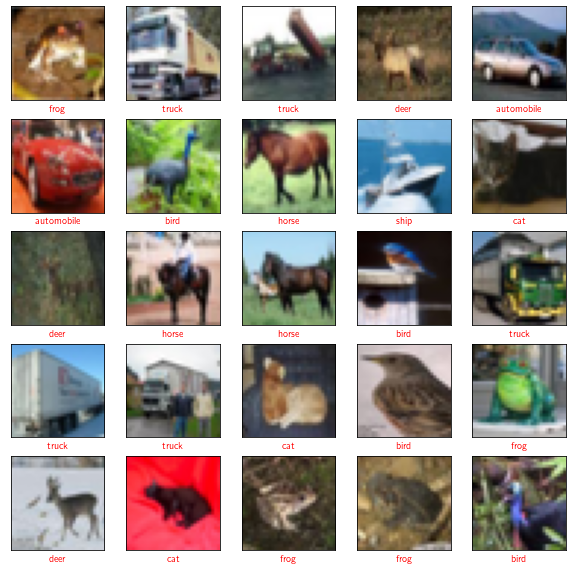

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], color='red')
plt.show()

In [22]:
# Add to our model what we need for a CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [33]:
# Train our model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 38s 762us/sample - loss: 1.5382 - accuracy: 0.4355 - val_loss: 1.3453 - val_accuracy: 0.5236
Epoch 2/10
50000/50000 [==============================] - 39s 789us/sample - loss: 1.1719 - accuracy: 0.5851 - val_loss: 1.1119 - val_accuracy: 0.6116
Epoch 3/10
50000/50000 [==============================] - 40s 800us/sample - loss: 1.0196 - accuracy: 0.6420 - val_loss: 1.0356 - val_accuracy: 0.6382
Epoch 4/10
50000/50000 [==============================] - 41s 815us/sample - loss: 0.9260 - accuracy: 0.6760 - val_loss: 0.9338 - val_accuracy: 0.6740
Epoch 5/10
50000/50000 [==============================] - 45s 902us/sample - loss: 0.8546 - accuracy: 0.6998 - val_loss: 0.8928 - val_accuracy: 0.6904
Epoch 6/10
50000/50000 [==============================] - 44s 878us/sample - loss: 0.7988 - accuracy: 0.7187 - val_loss: 0.8855 - val_accuracy: 0.6962
Epoch 7/10
50000/50000 [====================

In [52]:
# Save our model
if not os.path.exists('models'):
    os.mkdir('models')
    
model.save('models/')

INFO:tensorflow:Assets written to: models/assets


In [ ]:
# evaluation AFTER TRAINING. DO NOT USE IF LOADING FROM FILE
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [23]:
# Load our model
model = tf.keras.models.load_model('models/')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## Adversarial Attacks on Convolutional Network

### FGSM

- [x] Create an algorithm that uses the FGSM attack on the CNN developed above
- [x] Detect how the CNN behaves when the FGSM is used

In [30]:
# Classification getter

AIRPLANE = 0
AUTOMOBILE = 1
BIRD = 2
CAT = 3
DEER = 4
DOG = 5
FROG = 6
HORSE = 7
SHIP = 8
TRUCK = 9

# obtains the classification class in a string
# helps with displaying it is nicely in graphs
def get_classification_class(label: int) -> str:
    if label == AIRPLANE: return 'airplane'
    if label == AUTOMOBILE: return 'automobile'
    if label == BIRD: return 'bird'
    if label == CAT: return 'cat'
    if label == DEER: return 'deer'    
    if label == DOG: return 'dog'
    if label == FROG: return 'frog'
    if label == HORSE: return 'horse'
    if label == SHIP: return 'ship'
    if label == TRUCK: return 'truck'
    
    return 'NOT DEFINED'

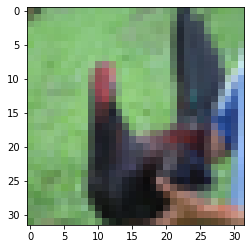

In [31]:
# find a picture for a classification
for image, classification in zip(test_images, test_labels):
    if classification == BIRD:
        plt.imshow(image)
        break

Prediction Vector:
[ 2.460741   -3.2701895  -1.4920111  -0.3650715  -0.02265224 -3.0178394
 -3.7820637  -3.88454     3.046203   -1.6128825 ]


Actual Class:
Name: ship, Value 8


Predicted Class:
Name: ship, Value: 8


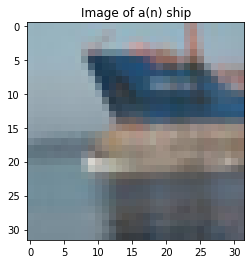

In [32]:
# Let's get an image from the test data and figure out what it predicts
IMAGE_INDEX = 126
input_image = tf.cast(np.expand_dims(test_images[IMAGE_INDEX], axis=0), tf.float32)

prediction = model.predict(input_image)

print('Prediction Vector:')
print(prediction[0])
print('\n')

label = np.argmax(prediction)

print('Actual Class:')
print('Name: %s, Value %i' % (get_classification_class(test_labels[IMAGE_INDEX]), 
                              test_labels[IMAGE_INDEX]))
print('\n')
print('Predicted Class:')
print('Name: %s, Value: %i' % (get_classification_class(label), 
                               label))

plt.title('Image of a(n) %s' % get_classification_class(test_labels[IMAGE_INDEX]))
plt.imshow(input_image[0])

In [38]:
# The FGSM method
loss_obj = losses.CategoricalCrossentropy()

def create_adversarial_pattern_FGSM(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image) # you have to change from model.predict(...) to 
                                        # just calling the object in tape??? wtf
        loss = loss_obj(input_label, input_image)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

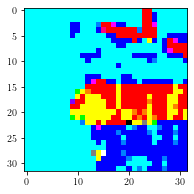

In [39]:
perturbations = create_adversarial_pattern_FGSM(input_image, label)
plt.imshow(perturbations[0]*0.5+0.5)

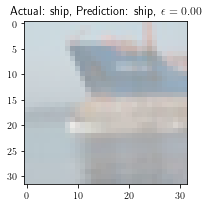

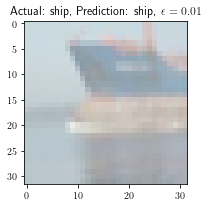

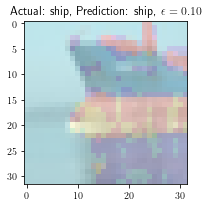

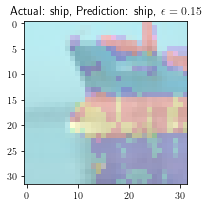

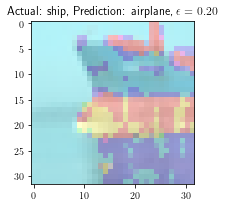

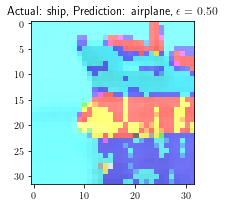

In [40]:
# display all the images

# use latex since we are mathematical in spirit
plt.rcParams["text.usetex"] = True

# this will display the images with each different epsilon and image
# helpful to see the progression of the FGSM attack
def display_images(image, epsilon):
    plt.figure()
    plt.rcParams["figure.figsize"] = (30,3)
    plt.imshow(image[0]*0.5+0.5)
    t_label = get_classification_class(test_labels[IMAGE_INDEX])
    p_label = get_classification_class(np.argmax(model.predict(image)))
    plt.title('Actual: %s, Prediction: %s, $\epsilon = %1.2f$' % (t_label, p_label, epsilon))
    plt.show()

epsilons = [0, 0.01, 0.1, 0.15, 0.20, .50]

for i, eps in enumerate(epsilons):
    adv_x = input_image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    display_images(adv_x, eps)

In [41]:
# Let's set up a whole prediction for the entire set of images to get accuracy changes
epsilons = [0, 0.01, 0.1, 0.2, 0.3]
test_copy = np.copy(test_images)

losses = []
accuracies = []

# start evaluating model on different epsilons to discover relationship between eps and 
# the accuracy of the model. It should go down as expected.
for i, eps in enumerate(epsilons):
    adv_xs = []
    display(Math('\epsilon = %1.2f' % eps))
    for index in range(test_images.shape[0]):
        test_images[index] = tf.clip_by_value(test_images[index] + eps*perturbations, -1, 1)
    
    loss, accuracy = model.evaluate(test_images,  test_labels, verbose=2)
    losses.append(loss)
    accuracies.append(accuracy)
    test_images = np.copy(test_copy)

<IPython.core.display.Math object>

10000/1 - 3s - loss: 0.8902 - accuracy: 0.6954


<IPython.core.display.Math object>

10000/1 - 3s - loss: 0.9210 - accuracy: 0.6925


<IPython.core.display.Math object>

10000/1 - 3s - loss: 1.3128 - accuracy: 0.5401


<IPython.core.display.Math object>

10000/1 - 3s - loss: 3.1317 - accuracy: 0.2958


<IPython.core.display.Math object>

10000/1 - 3s - loss: 4.5135 - accuracy: 0.2053


[0.6954, 0.6925, 0.5401, 0.2958, 0.2053]


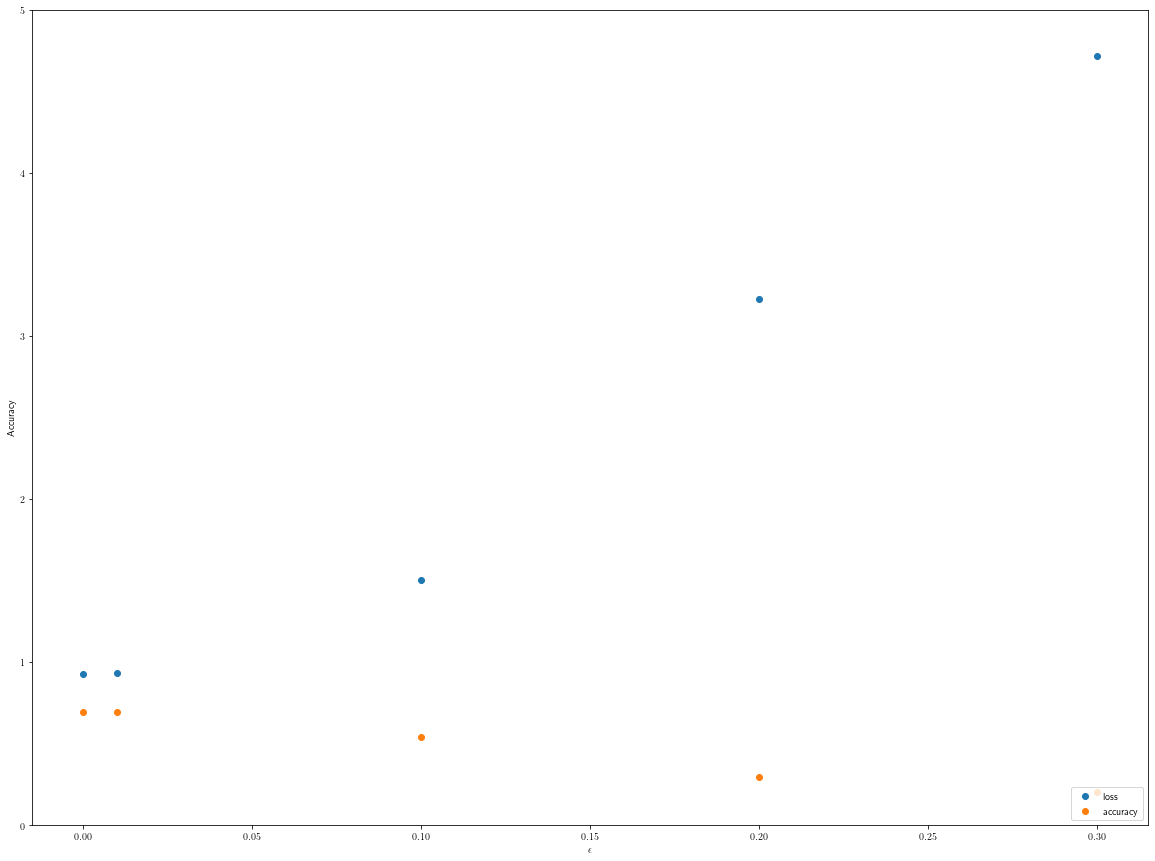

In [44]:
plt.rcParams["figure.figsize"] = (20,15)
# Plot our epsilon vs. accuracy
plt.plot(epsilons, losses, 'o', label='loss')
plt.plot(epsilons, accuracies, 'o', label='accuracy')


print(accuracies)
plt.xlabel('$\epsilon$')
plt.ylabel('Accuracy')
plt.ylim([0.0, 5])
coefs = np.polyfit(epsilons, accuracies, 1)

plt.legend(loc='lower right')